<a href="https://colab.research.google.com/github/Amine-OMRI/HR-Analytics/blob/data_preprocessing/HR_Analytics_Modeling_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall scikit-learn
!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 1.9MB/s 


In [11]:
!pip install tpot

     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 163kB 9.3MB/s 
     |████████████████████████████████| 166.7MB 42kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=4faf7ce590b963435357c34cbff8b4368cb8b10ac66feb2d16fb4175e2134b6a
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
!pip install imbalanced-learn
!pip install auto-sklearn

     |████████████████████████████████| 92kB 5.9MB/s 
     |████████████████████████████████| 166.7MB 84kB/s 
     |████████████████████████████████| 163kB 22.1MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=27b90d59c87171ecb275239bc4c44539bc5b04746d904ca6f5068c4c463c5283
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 6.1MB 6.6MB/s 
     |████████████████████████████████| 1.0MB 37.3MB/s 
     |████████████████████████████████| 4.2MB 38.1MB/s 
     |████████████████████████████████| 4.0MB 34.3MB/s 
     |████████████████████████████████| 266kB 43.5MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.6-cp37-none-any.whl size=6370105 sha256=c9b322705fc73894af53005f8bfcb5d54a786d0366e03ef9862

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import f1_score
from tqdm import tqdm

pd.set_option('display.max_rows', 500)

In [2]:
%matplotlib inline
sns.set()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 15, 5

# Loading the data

In [3]:
!git clone -b data_preprocessing https://github.com/Amine-OMRI/HR-Analytics.git

Cloning into 'HR-Analytics'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (306/306), done.
remote: Total 324 (delta 192), reused 43 (delta 14), pack-reused 0
Receiving objects: 100% (324/324), 8.63 MiB | 6.64 MiB/s, done.
Resolving deltas: 100% (192/192), done.


In [4]:
!ls HR-Analytics/Preprocessed_data

preprocessed_BINE_city_COMBINED_ORDE_experience_aug_test.csv
preprocessed_BINE_city_COMBINED_ORDE_experience_aug_train.csv
preprocessed_BINE_city_ORDE_experience_aug_test.csv
preprocessed_BINE_city_ORDE_experience_aug_train.csv
preprocessed_HACHE_city_COMBINED_ORDE_experience_aug_test.csv
preprocessed_HACHE_city_COMBINED_ORDE_experience_aug_train.csv
preprocessed_HACHE_city_ORDE_experience_aug_test.csv
preprocessed_HACHE_city_ORDE_experience_aug_train.csv
preprocessed_OHE_city_COMBINED_ORDE_experience_aug_test.csv
preprocessed_OHE_city_COMBINED_ORDE_experience_aug_train.csv
preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_test.csv
preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_train.csv
preprocessed_OHE_city_ORDE_experience_aug_test.csv
preprocessed_OHE_city_ORDE_experience_aug_train.csv
preprocessed_OHE_Combined_city_Experience_MISSING_MissVal_replaced_Gender_company_Type_Size_test.csv
preprocessed_OHE_Combined_city__Experience_MISSING_MissVal_replaced_

In [5]:
aug_train = pd.read_csv('/content/HR-Analytics/Preprocessed_data/preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_train.csv')
print("Detailed candidates train data row, cols: ", aug_train.shape)

Detailed candidates train data row, cols:  (19158, 136)


In [6]:
aug_test = pd.read_csv('/content/HR-Analytics/Preprocessed_data/preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_test.csv')
print("Detailed candidates test data row, cols: ", aug_test.shape)

Detailed candidates test data row, cols:  (2129, 135)


In [7]:
aug_train.columns

Index(['Unnamed: 0', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job',
       ...
       'code_city_90', 'code_city_91', 'code_city_93', 'code_city_94',
       'code_city_97', 'code_city_98', 'code_city_99',
       'city_development_index', 'training_hours', 'target'],
      dtype='object', length=136)

In [10]:
# The dataset is imbalance
aug_train.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [7]:
aug_test.drop(['Unnamed: 0'], axis=1, inplace= True)
aug_train.drop(['Unnamed: 0'], axis=1, inplace= True)

# Synthetic Minority Oversampling Technique
---
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

* **SMOTE** works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

* Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

*… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.*




In [12]:
from sklearn.externals import six

In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

ModuleNotFoundError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

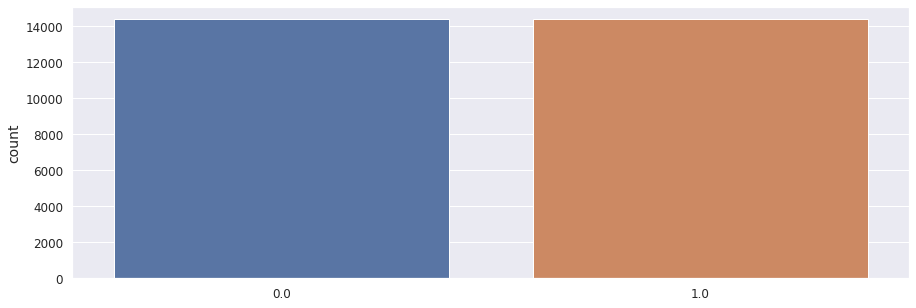

In [8]:
from imblearn.over_sampling import SMOTE
X = aug_train.drop(columns=['target']).values
y = aug_train['target'].values
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,y)
sns.countplot(Y_smote)

# Train/test Split

In [9]:
# imbalanced data
# X = aug_train.drop(columns=['target']).values
# y = aug_train['target'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SMOTE balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.1, random_state=42)


# Triying Scaling
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("Train set X:",X_train.shape, "y:", y_train.shape)
print("Val set  X:",X_val.shape, "y:",y_val.shape)
print("Test set X:",X_test.shape, "y:", y_test.shape)

Train set X: (19413, 134) y: (19413,)
Val set  X: (6472, 134) y: (6472,)
Test set X: (2877, 134) y: (2877,)


# AUTOML 

In [12]:
from tpot import TPOTClassifier

model = TPOTClassifier(generations=10, population_size=50,
                       cv=5,
                       scoring='accuracy',
                       config_dict='TPOT sparse', 
                       verbosity=2, random_state=777, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8566941620450734

Generation 2 - Current best internal CV score: 0.8569002679217179

Generation 3 - Current best internal CV score: 0.8569002679217179

Generation 4 - Current best internal CV score: 0.8569002679217179

Generation 5 - Current best internal CV score: 0.8579305054078578

Generation 6 - Current best internal CV score: 0.8579305054078578

Generation 7 - Current best internal CV score: 0.8579817598820098

Generation 8 - Current best internal CV score: 0.858909262863009

Generation 9 - Current best internal CV score: 0.858909262863009


In [1]:
# Export the model
model.export('./tpot_best_pipeline.py')

NameError: ignored

In [ ]:

#B est pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=10, n_estimators=100)

# Evaluation

In [ ]:
# Get results
results = pd.DataFrame()
# Make prediction on test set
y_pred = classifiers[key].predict_proba(X_test)[:,1]
# Save results in pandas dataframe object
results["y_test"] = y_test
results["y_pred"] = y_pred

In [ ]:
results

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      1440
         1.0       0.85      0.87      0.86      1437

    accuracy                           0.86      2877
   macro avg       0.86      0.86      0.86      2877
weighted avg       0.86      0.86      0.86      2877



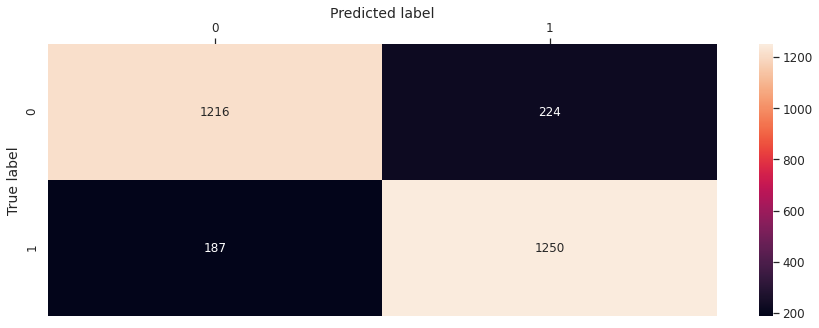

In [ ]:
# Check the stacking Confusion Matrix
y_pred = results["Stack"]
predictions = [round(value) for value in y_pred]
## Test set confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
print(classification_report(y_test, predictions))